Step 1 and Step 2:
Read the dataset into the Pandas DataFrame!
Does the dataset include any missing values? If so, delete the missing value entries!

I originally just ran df.dropna but after coming up with nothing to double check I added an " " to "NaN" replacer then ran it so either there are no missing values or I goofed it somehow

In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('results.csv')
sca = StandardScaler()
enc = LabelEncoder()
oenc = OneHotEncoder()

df=df.replace(r'^\s*$', np.nan, regex=True)
df.dropna(inplace=True,axis=0) #Drops missing values
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


Step 3.1:

How many tuples are there in the dataset?

Uses the len() command to count the amount of Tuples in the dataset

In [2]:
print("There are",len(df),"different Tuples")

There are 42650 different Tuples


Step 3.2:

How many tournaments are there in the dataset?

Assings the Tournaments to the variable Tourn and runs it through n.unique() to find the amount of unique Tournaments

In [3]:
Tourn= df.iloc[:, 5]
print("There are ",Tourn.nunique(),"different Tournaments")

There are  120 different Tournaments


Step 4.1 and Step 4.2:

Convert the column date to timestamps!

Find out how many matches in the dataset were played in 2018.

Uses to_datetime to turn the date column into timestamps and using the result, calculates the matches played in 2018 using value_counts

In [4]:
date = df.iloc[:, 0]
tmstmp = pd.to_datetime(df.date)
review =tmstmp.value_counts()[2018]
print(tmstmp)
print("")
print("There were", review, "matches played in the year 2018")

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
42645   2021-09-09
42646   2021-09-09
42647   2021-09-09
42648   2021-09-09
42649   2021-09-09
Name: date, Length: 42650, dtype: datetime64[ns]

There were 4 matches played in the year 2018


Step 5:
Calculate how many times the home team won, lost, or had a draw.

using the .loc command it grabs how many times the home score was either greater, less than, or equal to the away score, put it in a variable and printed out the results

In [5]:
win=df.loc[df['home_score'] > df['away_score'] ].shape[0]
lose=df.loc[df['home_score'] < df['away_score'] ].shape[0]
tie=df.loc[df['home_score'] == df['away_score'] ].shape[0]
print("The home team won", win, "games, lost",lose,"and tied",tie,"games adding up to a total of",(win+lose+tie),"games")

The home team won 20739 games, lost 12074 and tied 9837 games adding up to a total of 42650 games


Step 6.1:

Plot the numbers extracted from step 5 in a pie chart.

Using seaborn creates a pie using data from step 5 to make a pie chart by turning the values into percents, Home team wins 50% of the time pretty much which caught me off guard

([<matplotlib.patches.Wedge at 0x20a1ec7a400>,
 [Text(0.04746637221253046, 1.0989754062348174, 'Wins'),
  Text(-0.7639751740114014, -0.7914176732258695, 'Loses'),
  Text(0.8236470240463938, -0.7291128717691929, 'Ties')],
 [Text(0.025890748479562065, 0.5994411306735367, '49%'),
  Text(-0.4167137312789461, -0.43168236721411063, '28%'),
  Text(0.4492620131162147, -0.39769793005592335, '23%')])

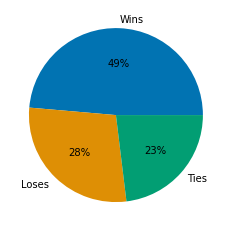

In [9]:
data = [win,lose,tie]
labels=["Wins","Loses","Ties"]
colors = sns.color_palette('colorblind')[0:3]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')

Step 6.2

Plot the neutral column as a pie chart.

([<matplotlib.patches.Wedge at 0x20a2572b220>,
 [Text(0.7828714132271628, 0.7727304512905552, 'True'),
  Text(-0.782871449401285, -0.7727304146416986, 'False')],
 [Text(0.4270207708511797, 0.4214893370675755, '25%'),
  Text(-0.427020790582519, -0.4214893170772901, '75%')])

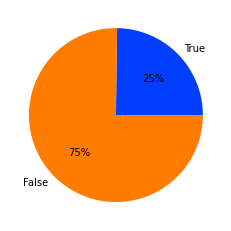

In [41]:
why=df.iloc[:, 8]
unique, counts = np.unique(why, return_counts=True)
must=counts[1]
you=counts[0]
neutral=[must,you]
ncolors=sns.color_palette('bright')[0:2]
nlabels=["True","False"]
plt.pie(neutral, labels = nlabels, colors = ncolors, autopct='%.0f%%')